In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import warnings
warnings.filterwarnings('ignore')

In [3]:
stock_symbol = 'MSFT'
csv_filename = 'stock.csv'  
data = pd.read_csv(csv_filename)  
data['Date'] = pd.to_datetime(data['Date'])


In [4]:
data = data['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

In [5]:
train_size = int(0.8 * len(data))
train_data, test_data = data[:train_size], data[train_size:]

In [6]:
sequence_length = 30  
X_train, y_train = [], []
for i in range(len(train_data) - sequence_length):
    X_train.append(train_data[i:i+sequence_length])
    y_train.append(train_data[i+sequence_length])
X_train, y_train = np.array(X_train), np.array(y_train)

In [7]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [8]:
model.fit(X_train, y_train, epochs=10, batch_size=16)

Epoch 1/50
251/251 [==============================] - 8s 19ms/step - loss: 8.2013e-04
Epoch 2/50
251/251 [==============================] - 5s 20ms/step - loss: 4.2349e-05
Epoch 3/50
251/251 [==============================] - 5s 20ms/step - loss: 4.1001e-05
Epoch 4/50
251/251 [==============================] - 5s 20ms/step - loss: 4.0320e-05
Epoch 5/50
251/251 [==============================] - 5s 20ms/step - loss: 3.5399e-05
Epoch 6/50
251/251 [==============================] - 5s 21ms/step - loss: 3.2227e-05
Epoch 7/50
251/251 [==============================] - 5s 20ms/step - loss: 3.2662e-05
Epoch 8/50
251/251 [==============================] - 5s 20ms/step - loss: 2.9184e-05
Epoch 9/50
251/251 [==============================] - 5s 21ms/step - loss: 2.8819e-05
Epoch 10/50
251/251 [==============================] - 5s 19ms/step - loss: 2.5267e-05
Epoch 11/50
251/251 [==============================] - 5s 20ms/step - loss: 2.8138e-05
Epoch 12/50
251/251 [==============================]

In [9]:
inputs = data[len(data) - len(test_data) - sequence_length:]
X_test = []
for i in range(len(test_data)):
    X_test.append(inputs[i:i+sequence_length])
X_test = np.array(X_test)
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

32/32 [==============================] - 1s 9ms/step


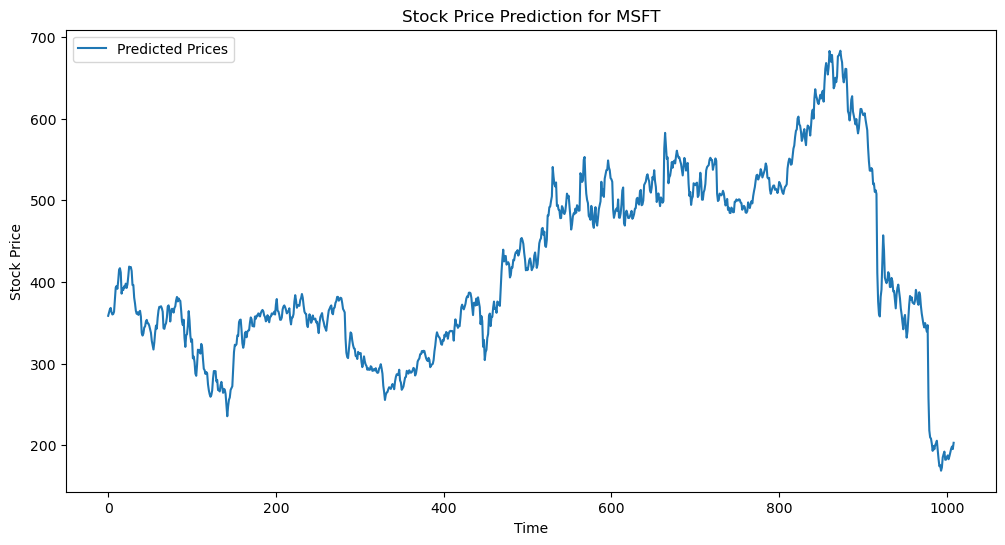

In [16]:

plt.figure(figsize=(12, 6))
plt.plot(predicted_prices, label='Predicted Prices')
plt.title(f'Stock Price Prediction for {stock_symbol}')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
